In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# some_file.py
import sys

# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/content/gdrive/MyDrive/Project/LDL/code')

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
f_path = '/content/gdrive/MyDrive/Project/Detection/VOC2007/Annotations/levle1_157.xml'
with open(f_path, "r") as f:
  tree = ET.parse(f)

root = tree.getroot()

In [ ]:
root

<Element 'annotation' at 0x7f4c57771c50>

### filename

In [ ]:
test_fn = root.find("filename").text
test_fn

'levle1_157.jpg'

### [OPTIONAL] file size

In [ ]:
f_width, f_height, f_depth = root.find("size/width").text, \
                             root.find("size/height").text, \
                             root.find("size/depth").text

In [ ]:
f_width, f_height, f_depth

('3112', '3456', '3')

In [ ]:
for obj in root.findall("object"):
  try:
    x_min = int(obj.find("bndbox/xmin").text)
    y_min = int(obj.find("bndbox/ymin").text)
    x_max = int(obj.find("bndbox/xmax").text)
    y_max = int(obj.find("bndbox/ymax").text)
  except:
    x_min, x_max, y_min, y_max = 0, 0, 0, 0
  print(x_min, x_max, y_min, y_max)

1183 1306 2297 2397
1122 1206 2382 2474
1689 1788 1945 2014
1375 1459 2481 2581
1773 1888 2911 3033
1528 1666 2734 2826
1313 1397 2949 3041
1375 1443 3018 3125
1489 1612 3064 3163


In [ ]:
print(obj.find("bndbox/xmin").text)

1489


In [ ]:
if obj.find("bndbox/xmin") is None:
  x_min = 0
else:

  x_min = int(obj.find("bndbox/xmin").text)
x_min

1489

In [ ]:
bndboxes = []
for obj in root.findall("object"):
  ### meta data
  name = "" if obj.find("name") is None else obj.find("name").text
  pose = "" if obj.find("pose") is None else obj.find("name").text
  trunc = "" if obj.find("truncated") is None else obj.find("name").text
  diff = "" if obj.find("difficult") is None else obj.find("name").text
  ### bounding boxes
  x_min = 0 if obj.find("bndbox/xmin") is None else int(obj.find("bndbox/xmin").text)
  y_min = 0 if obj.find("bndbox/ymin") is None else int(obj.find("bndbox/ymin").text)
  x_max = 0 if obj.find("bndbox/xmax") is None else int(obj.find("bndbox/xmax").text)
  y_max = 0 if obj.find("bndbox/ymax") is None else int(obj.find("bndbox/ymax").text)

  # print(x_min, y_min, x_max, y_max)
  bndboxes.append([x_min, y_min, x_max, y_max])
bndboxes

[[1183, 2297, 1306, 2397],
 [1122, 2382, 1206, 2474],
 [1689, 1945, 1788, 2014],
 [1375, 2481, 1459, 2581],
 [1773, 2911, 1888, 3033],
 [1528, 2734, 1666, 2826],
 [1313, 2949, 1397, 3041],
 [1375, 3018, 1443, 3125],
 [1489, 3064, 1612, 3163]]

## Walk through folders containing all XML

In [ ]:
import os
test_heatmap_dir = '/content/gdrive/MyDrive/Project/Heatmaps Resnet 34/'
test_files = set([f_name.split(".")[0] for f_name in os.listdir(test_heatmap_dir)])
test_files

{'levle0_110',
 'levle0_113',
 'levle0_116',
 'levle0_119',
 'levle0_127',
 'levle0_129',
 'levle0_130',
 'levle0_136',
 'levle0_139',
 'levle0_140',
 'levle0_146',
 'levle0_152',
 'levle0_155',
 'levle0_157',
 'levle0_158',
 'levle0_160',
 'levle0_162',
 'levle0_17',
 'levle0_172',
 'levle0_173',
 'levle0_185',
 'levle0_190',
 'levle0_195',
 'levle0_198',
 'levle0_20',
 'levle0_209',
 'levle0_216',
 'levle0_229',
 'levle0_230',
 'levle0_232',
 'levle0_239',
 'levle0_24',
 'levle0_244',
 'levle0_246',
 'levle0_253',
 'levle0_256',
 'levle0_259',
 'levle0_26',
 'levle0_260',
 'levle0_267',
 'levle0_268',
 'levle0_28',
 'levle0_281',
 'levle0_296',
 'levle0_305',
 'levle0_306',
 'levle0_316',
 'levle0_328',
 'levle0_329',
 'levle0_330',
 'levle0_349',
 'levle0_351',
 'levle0_36',
 'levle0_367',
 'levle0_374',
 'levle0_385',
 'levle0_39',
 'levle0_390',
 'levle0_391',
 'levle0_393',
 'levle0_394',
 'levle0_396',
 'levle0_399',
 'levle0_404',
 'levle0_413',
 'levle0_422',
 'levle0_424',
 '

In [ ]:

xml_dir = '/content/gdrive/MyDrive/Project/Detection/VOC2007/Annotations/' ### change PATH
all_files = {}
for f_name in os.listdir(xml_dir):
  f_bnd_boxes = {}
  if f_name.endswith("xml") and (f_name.split(".")[0] in test_files):
    f_path = (xml_dir + f_name)
    with open(f_path, "r") as f:
      if f:
        tree = ET.parse(f)

        root = tree.getroot()
        test_fn = root.find("filename").text
        f_bnd_boxes["test_file"] = test_fn+'.jpg'
        f_width, f_height, f_depth = root.find("size/width").text, \
                             root.find("size/height").text, \
                             root.find("size/depth").text
        bndboxes = []
        for obj in root.findall("object"):
          name = "" if obj.find("name") is None else obj.find("name").text
          pose = "" if obj.find("pose") is None else obj.find("name").text
          trunc = "" if obj.find("truncated") is None else obj.find("name").text
          diff = "" if obj.find("difficult") is None else obj.find("name").text
          ### bounding boxes
          x_min = 0 if obj.find("bndbox/xmin") is None else int(obj.find("bndbox/xmin").text)
          y_min = 0 if obj.find("bndbox/ymin") is None else int(obj.find("bndbox/ymin").text)
          x_max = 0 if obj.find("bndbox/xmax") is None else int(obj.find("bndbox/xmax").text)
          y_max = 0 if obj.find("bndbox/ymax") is None else int(obj.find("bndbox/ymax").text)

          # print(x_min, y_min, x_max, y_max)
          bndboxes.append([x_min, y_min, x_max, y_max])
      f_bnd_boxes["bndboxes"] = bndboxes
    all_files[f_name] = f_bnd_boxes
  # break

In [ ]:
all_files

{'levle0_110.xml': {'bndboxes': [[2309, 2236, 2432, 2374],
   [1229, 3002, 1344, 3156]],
  'test_file': 'levle0_110.jpg.jpg'},
 'levle0_113.xml': {'bndboxes': [[2263, 750, 2394, 895]],
  'test_file': 'levle0_113.jpg.jpg'},
 'levle0_116.xml': {'bndboxes': [[1589, 2911, 1658, 2995],
   [1466, 2351, 1543, 2420]],
  'test_file': 'levle0_116.jpg.jpg'},
 'levle0_119.xml': {'bndboxes': [[2700, 1232, 2815, 1416]],
  'test_file': 'levle0_119.jpg.jpg'},
 'levle0_127.xml': {'bndboxes': [[2693, 2121, 2853, 2313],
   [1597, 2964, 1765, 3102]],
  'test_file': 'levle0_127.jpg.jpg'},
 'levle0_129.xml': {'bndboxes': [[2317, 2014, 2440, 2144]],
  'test_file': 'levle0_129.jpg.jpg'},
 'levle0_130.xml': {'bndboxes': [[2547, 910, 2654, 1033]],
  'test_file': 'levle0_130.jpg.jpg'},
 'levle0_136.xml': {'bndboxes': [[1198, 773, 1329, 918]],
  'test_file': 'levle0_136.jpg.jpg'},
 'levle0_139.xml': {'bndboxes': [[1643, 2826, 1781, 2926],
   [1489, 2872, 1612, 3002]],
  'test_file': 'levle0_139.jpg.jpg'},
 'levle

In [ ]:
len(all_files)

292

In [ ]:
import matplotlib.pyplot as plt
import cv2

processing contents from levle2_35.xml ...
saved file at levle2_35.jpg ...
Done processing levle2_35.xml ...
processing contents from levle1_526.xml ...
saved file at levle1_526.jpg ...
Done processing levle1_526.xml ...
processing contents from levle3_37.xml ...
saved file at levle3_37.jpg ...
Done processing levle3_37.xml ...
processing contents from levle0_232.xml ...
saved file at levle0_232.jpg ...
Done processing levle0_232.xml ...
processing contents from levle1_154.xml ...
saved file at levle1_154.jpg ...
Done processing levle1_154.xml ...
processing contents from levle1_55.xml ...
saved file at levle1_55.jpg ...
Done processing levle1_55.xml ...
processing contents from levle0_17.xml ...
saved file at levle0_17.jpg ...
Done processing levle0_17.xml ...
processing contents from levle1_355.xml ...
saved file at levle1_355.jpg ...
Done processing levle1_355.xml ...
processing contents from levle1_203.xml ...
saved file at levle1_203.jpg ...
Done processing levle1_203.xml ...
proc

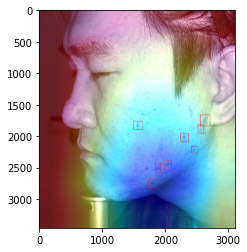

In [ ]:
for k, v in all_files.items():
  print("processing contents from {} ...".format(k))
  img_path = test_heatmap_dir+v['test_file']
  with open(img_path, "r") as f:
    if f:
      img = cv2.imread(img_path)

      for bndbox in v['bndboxes']:
        annotated_img = cv2.rectangle(img,(bndbox[0],bndbox[1]),(bndbox[2],bndbox[3]),(255, 0, 0),4) # add rectangle to image
      plt.imshow(img);
      img_name = k.split(".")[0] + ".jpg"

      cv2.imwrite('/content/gdrive/MyDrive/Project/Annotated 34 Heatmaps/'+ img_name, annotated_img) ### change to GDrive folder
      print("saved file at {} ...".format(img_name))
      print("Done processing {} ...".format(k))
